# Chapter 3 Exercises

## Set Up

In [2]:
# file paths
data_root = "https://raw.githubusercontent.com/kmerkl22/k-s-ISL/main/Data/"
image_root = "https://github.com/kmerkl22/k-s-ISL/raw/main/Images/"

In [3]:
# imports
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

## Problem 8

This question involves the use of simple linear regression on the Auto
data set.

### Part a
Use the sm.OLS() function to perform a simple linear regression
with mpg as the response and horsepower as the predictor. Use
the summarize() function to print the results. Comment on the
output. For example:
1.   Is there a relationship between the predictor and the response?
2.   How strong is the relationship between the predictor and
the response?
3.   Is the relationship between the predictor and the response
positive or negative?
4.   What is the predicted mpg associated with a horsepower of
98? What are the associated 95 % confdence and prediction
intervals?

In [4]:
Auto = load_data("Auto")
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [5]:
X = pd.DataFrame({'intercept': np.ones(Auto.shape[0]),
                  'horsepower': Auto['horsepower']})
X[:4]

,intercept,horsepower
0,1.0,130
1,1.0,165
2,1.0,150
3,1.0,150


In [6]:
y = Auto['mpg']
model = sm.OLS(y, X)
results = model.fit()

In [7]:
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [8]:
design = MS(['horsepower'])
design = design.fit(Auto)
new_df = pd.DataFrame({'horsepower':[98]})
newX = design.transform(new_df)
newX

,intercept,horsepower
0,1.0,98


In [9]:
new_prediction = results.get_prediction(newX)
new_prediction.predicted_mean

array([24.46707715])

In [10]:
#95% confidence interval
new_prediction.conf_int(alpha=0.05)

array([[23.97307896, 24.96107534]])

In [11]:
39.9359	+ -0.1578*98

24.4715

In [12]:
#prediction interval - wider?
new_prediction.conf_int(obs=True, alpha=0.05)

array([[14.80939607, 34.12475823]])

### Part b
Plot the response and the predictor in a new set of axes ax. Use
the ax.axline() method or the abline() function defined in the
lab to display the least squares regression line.

In [13]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

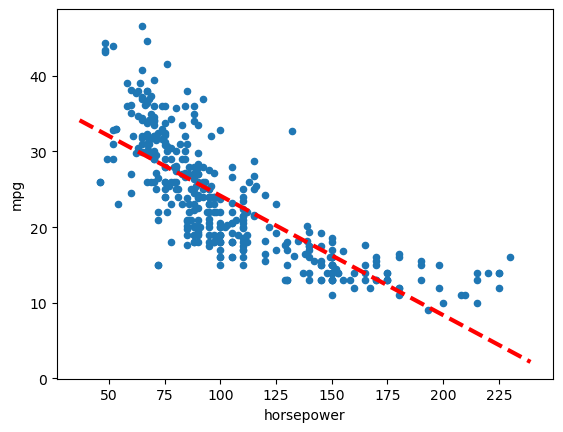

In [14]:
ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax,
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)

### Part c
Produce some of diagnostic plots of the least squares regression
fit as described in the lab. Comment on any problems you see
with the fit.

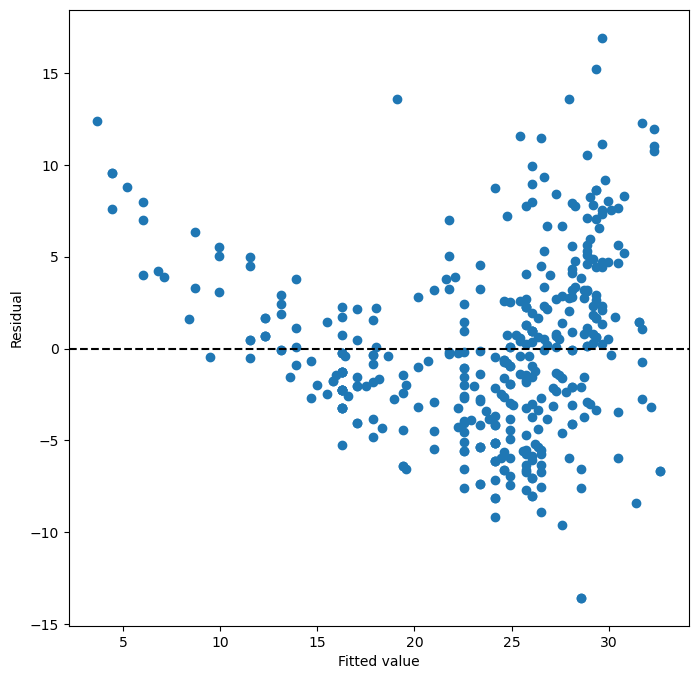

In [15]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

115

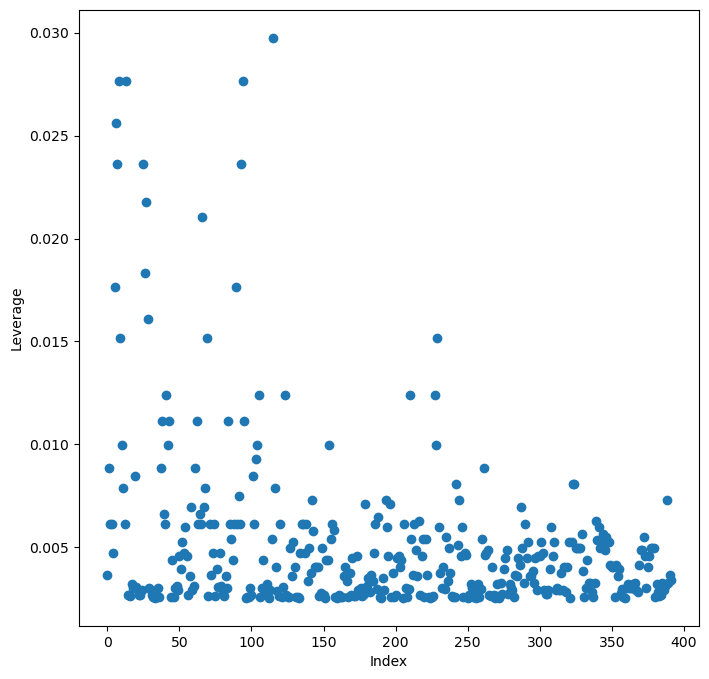

In [16]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

## Problem 10

In [17]:
Carseats = load_data("Carseats")
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [18]:
Carseats['Sales']

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

### Part a
Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [19]:
design = MS(['Price', 'Urban', 'US']).fit(Carseats)
X = design.transform(Carseats)
y = Carseats['Sales']
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


In [20]:
terms = Carseats.columns.drop('Sales')
terms

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [21]:
X = MS(terms).fit_transform(Carseats)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,5.6606,0.603,9.380,0.000
CompPrice,0.0928,0.004,22.378,0.000
Income,0.0158,0.002,8.565,0.000
Advertising,0.1231,0.011,11.066,0.000
Population,0.0002,0.000,0.561,0.575
Price,-0.0954,0.003,-35.700,0.000
ShelveLoc[Good],4.8502,0.153,31.678,0.000
ShelveLoc[Medium],1.9567,0.126,15.516,0.000
Age,-0.0460,0.003,-14.472,0.000
Education,-0.0211,0.020,-1.070,0.285


In [22]:
X

,intercept,CompPrice,Income,Advertising,Population,Price,ShelveLoc[Good],ShelveLoc[Medium],Age,Education,Urban[Yes],US[Yes]
0,1.0,138,73,11,276,120,0.0,0.0,42,17,1.0,1.0
1,1.0,111,48,16,260,83,1.0,0.0,65,10,1.0,1.0
2,1.0,113,35,10,269,80,0.0,1.0,59,12,1.0,1.0
3,1.0,117,100,4,466,97,0.0,1.0,55,14,1.0,1.0
4,1.0,141,64,3,340,128,0.0,0.0,38,13,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,138,108,17,203,128,1.0,0.0,33,14,1.0,1.0
396,1.0,139,23,3,37,120,0.0,1.0,55,11,0.0,1.0
397,1.0,162,26,12,368,159,0.0,1.0,40,18,1.0,1.0
398,1.0,100,79,7,284,95,0.0,0.0,50,12,1.0,1.0


In [23]:
-0.0545*83 + 13.0435 -.0219 + 1.2006

9.698699999999999

In [24]:
just3 = Carseats.columns.drop(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Education'])
just3

Index(['Age', 'Urban', 'US'], dtype='object')

In [25]:
X = MS(just3).fit_transform(Carseats)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,9.0523,0.534,16.947,0.00
Age,-0.0406,0.008,-4.846,0.00
Urban[Yes],-0.1067,0.298,-0.359,0.72
US[Yes],1.0605,0.283,3.741,0.00


In [26]:
new_df = Carseats.iloc[0:3]
newX = design.transform(new_df)
new_df
newX

,intercept,Price,Urban[Yes],US[Yes]
0,1.0,120,1.0,1.0
1,1.0,83,1.0,1.0
2,1.0,80,1.0,1.0


In [27]:
new_prediction=results.get_prediction(newX)
new_prediction.predicted_mean

array([5.13442717, 6.63651208, 6.75830275])

In [28]:
design = MS(['Price', 'Urban', 'US']).fit(Carseats)
X = design.transform(Carseats)
y = Carseats['Sales']
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


### Part b
Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

    If the price increases by $100, the sales will drop by approximately 5.45 carseats.

    The predicted sales in Urban regions is 13.0216, while the predicted sales in rural areas is 13.0435.

    The predicted sales in the US is 14.2441, while the predicted sales in other countries is 13.0435.


### Part c
Write out the model in equation form, being careful to handle the qualitative variables properly.

y = -0.0545x1 + 9.0523 -.1067x2 + 1.0605x3

### Part d
Question: For which of the predictors can you reject the null hypothesis H0 :βj =0?

Solution: It seems like we can only reject the null hypothesis for Urban, because the t-statistics is small and the p-value is 93.6%. So the probability of seeing Urban[Yes] given Sales is high. For Price and US, we see a probability of virtually zero given Sales, so we cannot reject the null hypothesis for those.

### Part e
On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [29]:
design = MS(['Urban']).fit(Carseats)
X = design.transform(Carseats)
y = Carseats['Sales']
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,7.5636,0.26,29.060,0.000
Urban[Yes],-0.0954,0.31,-0.308,0.759


### Part f
 How well do the models in (a) and (e) fit the data?
 

    To analyze this, let us compare our approximations using each model.

In [31]:
7.5636-0.0954

7.4682

    So 7.4682 is the predicted sales given Urban in model (e). This seems closer to the predicted mean we found of 6.63651208. While model (a) gave a prediction of 13.0216 in urban regions.


### Part g
Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

In [32]:
[-0.0954 - 2*.31,-0.0954 +2*.31]

[-0.7154, 0.5246]

    There is a 95% chance that the true value of the coefficient for Urban[Yes] is in this interval.


### Part h
Is there evidence of outliers or high leverage observations in the model from (e)?

    Not sure how one detects outliers in a yes/no situation
